<a href="https://colab.research.google.com/github/harshitismm/datascience/blob/master/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: This program uses an artificial recurrent neural network called long short Term memory(LSTM)
# to predict the closing stock price of a corporation(Apple Inc.) using the past 60 da stock price.

In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [7]:
#get the stock quote
df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01', end='2020-06-6')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-06-01,322.350006,317.209991,317.750000,321.850006,20197800.0,321.850006
2020-06-02,323.440002,318.929993,320.750000,323.339996,21910700.0,323.339996
2020-06-03,326.200012,322.299988,324.660004,325.119995,26122800.0,325.119995


In [8]:
#get the no. of rows and column in the data set
df.shape

(2120, 6)

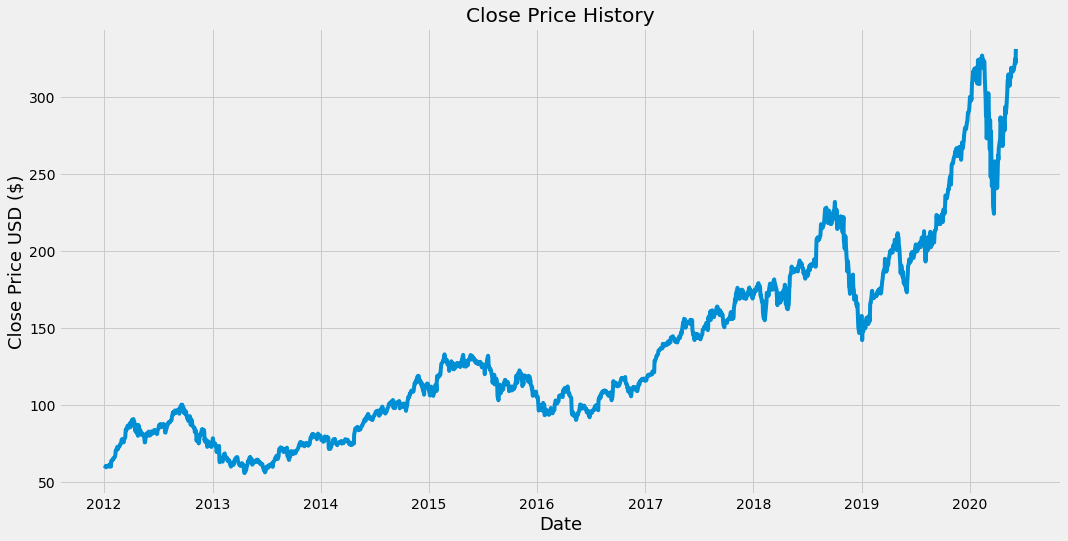

In [9]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [12]:
#create a new dataframe with only the close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1696

1696

In [13]:
#scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01072555],
       [0.01187065],
       [0.01424892],
       ...,
       [0.97685973],
       [0.96670417],
       [1.        ]])

In [15]:
#create the training dataset
#create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01072555, 0.01187065, 0.01424892, 0.01651321, 0.01616605,
       0.01694844, 0.01659092, 0.01598988, 0.01517122, 0.01770494,
       0.01998995, 0.01928527, 0.01542511, 0.0191091 , 0.0154821 ,
       0.02908335, 0.02803152, 0.0294046 , 0.03237355, 0.0341715 ,
       0.03402124, 0.03346684, 0.03582957, 0.03805239, 0.04057058,
       0.044638  , 0.05318217, 0.05331171, 0.05806827, 0.06162271,
       0.0555138 , 0.05786618, 0.05781955, 0.06441552, 0.06347766,
       0.06521343, 0.06833266, 0.07006845, 0.07506853, 0.07871108,
       0.07976288, 0.08013078, 0.07390271, 0.07240008, 0.07262289,
       0.07847789, 0.08012561, 0.0836645 , 0.09200661, 0.10313632,
       0.10105338, 0.10105855, 0.10910532, 0.11162349, 0.10983071,
       0.1081934 , 0.1064887 , 0.11215199, 0.11603808, 0.11766504])]
[0.1136442469575053]

[array([0.01072555, 0.01187065, 0.01424892, 0.01651321, 0.01616605,
       0.01694844, 0.01659092, 0.01598988, 0.01517122, 0.01770494,
       0.01998995, 0.01928527, 0.015

In [0]:
#convet the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [20]:
#reshape the data
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1] ,1))
x_train.shape

(1636, 60, 1)

In [0]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50 , return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [25]:
model.fit(x_train, y_train ,batch_size=1, epochs=1)

Epoch 1/1
1636/1636 [==============================] - 69s 42ms/step - loss: 2.7619e-04


In [0]:
#Create a new array containing scaled values from index 1636 to 2003
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60 , len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [0]:
x_test = np.array(x_test)

In [0]:
x_test = np.reshape(x_test , (x_test.shape[0], x_test.shape[1], 1))

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [33]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.903483840654481

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


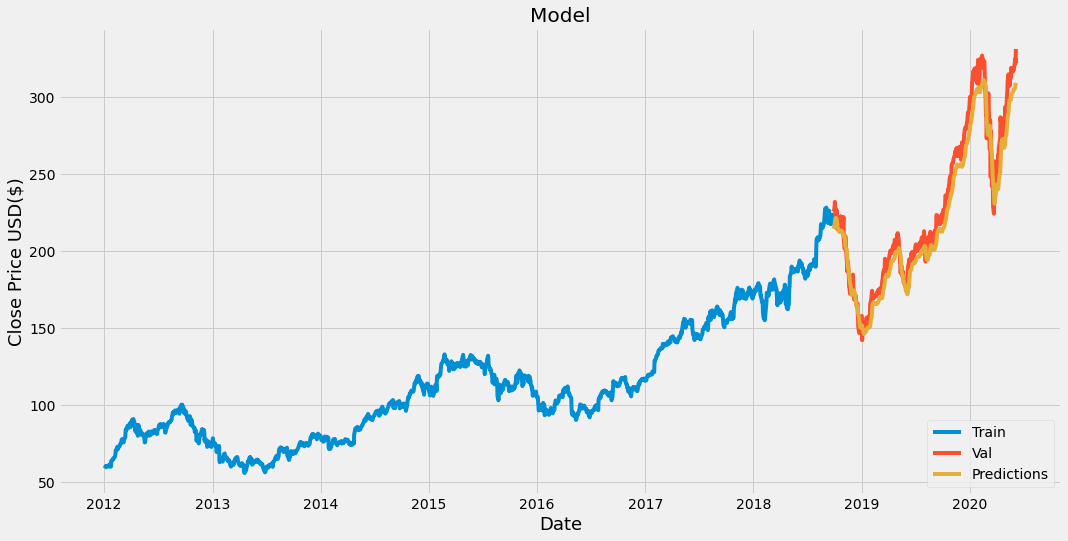

In [34]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [35]:
valid

,Close,Predictions
Date,,
2018-09-28,225.740005,214.601700
2018-10-01,227.259995,215.845490
2018-10-02,229.279999,217.249268
2018-10-03,232.070007,218.818542
2018-10-04,227.990005,220.649582
...,...,...
2020-06-01,321.850006,305.518280
2020-06-02,323.339996,306.274323
2020-06-03,325.119995,307.370667


In [37]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[266.2315]]


In [38]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-06-06', end='2020-06-06')
print(apple_quote2['Close'])

Date
2020-06-05    331.5
Name: Close, dtype: float64
